In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('../DATA/car_plate.jpg')

In [4]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

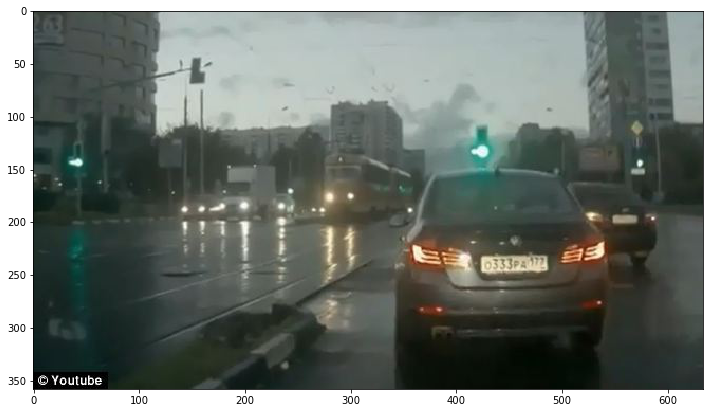

In [5]:
display(img)

In [6]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')

In [17]:
def detect_plate(img):
    
    plate_img = img.copy()
    
    plate_rect = plate_cascade.detectMultiScale(plate_img)
    
    for (x,y,w,h) in plate_rect:
        
#         cv2.rectangle(plate_img, (x,y), (x+w, y+h), (255,0,0), -1)
        
        # top left corner
        x_offset = x
        y_offset = y
        
        roi = plate_img[y_offset:y_offset+h, x_offset:x_offset+w]
        
        roi = cv2.blur(roi, ksize=(5,5))
        
        plate_img[y_offset:y_offset+h, x_offset:x_offset+w] = roi
        
    return plate_img
    

In [18]:
result = detect_plate(img)

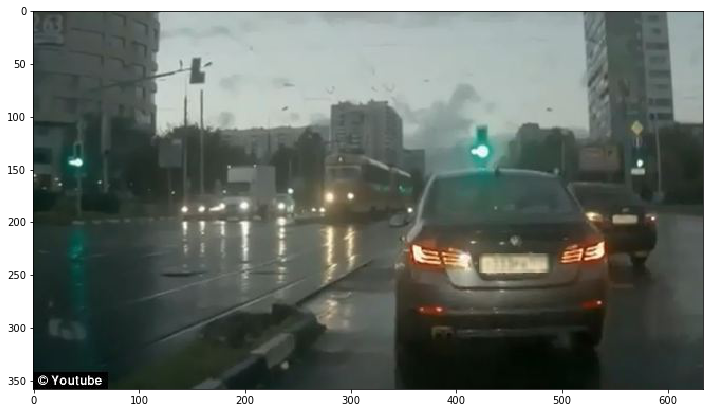

In [19]:
display(result)